# **PROYECTO FINAL-AA**

### Nombre de los alumnos:

- Iván Salinas López
- Javier Moreno Morón

### Fecha del proyecto:
- Mayo del 2023 - Junio del 2023

### Base de datos seleccionada:
- Default of Credit Card Clients (6)

In [ ]:
import seaborn as sns # para algunos gráficos
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate # para hacer cross validation
from tabulate import tabulate # para crear tablas


import warnings # para evitar warnings de convergencia
from sklearn.exceptions import ConvergenceWarning

# Filtrar las advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)

sns.set(rc = {'figure.figsize':(10,8)}) # para gráficas bonitas

Utilizaremos la librería pandas para importar el dataset del problema. El motivo de usar esta librería es que es fácil de usar y se pueden visualizar muy bien los datos. Además incluye funciones para el tratamiento y análisis de los datos.

In [ ]:
# CODIGO DE DESCARGA y expansión de la BBDD (USAR PRIORITARIAMENTE LA CONSIGNA DE LA UGR)

# Enlace a la pag web de la BBDD: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

import pandas as pd

dataframe = pd.read_excel('https://consigna.ugr.es/download.php?token=ca640e0e-38e7-43b3-8d80-dedbb065c721&files_ids=35983', header=1)
dataframe.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 1. Descripción del problema

Este dataset se han adquirido del repositorio UCI. En concreto el problema se basa en encontrar una función $f$ que prediga si un cliente incurre a impago o no. Para ello el dataset consta de 30000 ejemplos con 23 variables predictoras y 1 variable objetivo binaria (0 o 1) que es la que se busca predecir, en la cual 0 significa que el usuario no incurrirá en impago y 1 en que si incurrirá.

Los elementos del problema son:

*   $X$ : es una matriz que contiene las variables de entrada o características del problema. Representan la información que se proporciona al modelo de aprendizaje para poder realizar predicciones. Cada columna de la matriz es una característica (el número de características define la dimensionalidad), y cada fila es una instancia/ejemplo del problema
*   $Y$ : es un vector que contiene la variable de salida o variable objetivo del problema. Representan el resultado que se quiere predecir a través de las variables de entrada. Cada valor del vector representa el valor de salida o el valor objetivo de cada instancia de $X$. Al ser un problema de clasificación, la variable a predecir será binaria
*   $f$ : es la función objetivo que queremos predecir. Nunca vamos a saber cuál es pero nuestro objetivo es encontrar una función que se aproxime lo mejor posible a $f$ a través de nuestro modelo de aprendizaje. Siendo $f: X \rightarrow Y$

Para entender y analizar mejor el problema debemos tener claras una serie de cuestiones:

*   No se proporciona información sobre la fuente exacta de los datos o su origen específico. Sin embargo, estos datos suelen ser recopilados a través de encuestas, registros financieros o bases de datos de instituciones financieras...
*   Tenemos las siguientes variables:
    *  X1: Cantidad de crédito recibida (en dólares de Nueva Taiwán)
    *  X2: Género (1 = masculino; 2 = femenino)
    *  X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = escuela secundaria; 4 = otros)
    *  X4: Estado civil (1 = casado; 2 = soltero; 3 = otros)
    *  X5: Edad (en años)
    *  X6 - X11: Historial de pagos pasados (de abril a septiembre de 2005). Se realizaron seguimientos de los registros de pago mensuales anteriores de la siguiente manera: X6 = estado de pago en septiembre; X7 = estado de pago en agosto; ...; X11 = estado de pago en abril. La escala de medición para el estado de pago es: (<= 0) = pago puntual; 1 = retraso de pago de un mes; ... ; 9 = retraso de pago de nueve meses o más
    *  X12-X17: Cantidad de dinero en la cuenta (en dólares de Nueva Taiwán) (de abril a septiembre de 2005). X12 = cantidad del dinero en cuenta en septiembre; ... ; X17 = cantidad del dinero en cuenta en abril.
    *  X18-X23: Cantidad del pago anterior (en dólares de Nueva Taiwán) (de abril a septiembre). X18 = cantidad pagada en septiembre; ... ; X23 = cantidad pagada en abril.
*   Para la variable objetivo:
    *  La clase positiva será el 0
    *  La clase negativa será el 1.

### 2. Codificación y definición de los conjuntos de entrenamiento y test

Antes de separar en train y test, vamos a codificar las variables categóricas mediante el método dummy de pandas (preferimos dummy a one-hot-encoding porque necesita una variable menos para codificar). El motivo de codificar antes de separar es que si separamos y luego codificamos por separado quizá hay algunas categorías que solo están en train o algunas que solo están en test y entonces se codifican en menos/más variables. Por tanto para evitar este problema codificamos antes.

Las variables categóricas están codificadas de forma ordinal pero eso puede ser un problema porque el valor 4 no tiene por qué ser 4 veces el valor 1. Por tanto, vamos a codificarlas con dummy.

Hemos de aclarar que para las variables X6-X11 los valores menores o iguales que 0 significan todos lo mismo, por tanto los vamos a poner 0.

In [ ]:
from sklearn.model_selection import train_test_split # para dividir el dataset en los conjuntos de train y test

dataframe = dataframe.drop(dataframe.columns[0], axis=1)
x = dataframe.drop('default payment next month', axis=1)
y = dataframe['default payment next month']

print("El número de instancias del problema es: " + str(x.shape[0]))

print("El número de características del problema es: " + str(x.shape[1]))

# Codificamos antes de separar
categoricas_indices = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]
continuas_indices = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

pagos = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Los valores <= 0 se ponen a 0 porque significan lo mismo
x[pagos] = x[pagos].applymap(lambda x: 0 if x < 0 else x)

# Codificación dummy
x_cod = pd.get_dummies(x, columns=categoricas_indices, drop_first=True)

print("El nuevo número de características del problema tras codifciar las variables categóricas es: " + str(x_cod.shape[1]))

# Actualizamos los nuevos índices de las variables categóricas
categoricas_indices = [col for col in x_cod.columns.tolist() if col not in continuas_indices]

El número de instancias del problema es: 30000
El número de características del problema es: 23
El nuevo número de características del problema tras codifciar las variables categóricas es: 70


Ahora para el particionamiento de los datos utilizaremos la función de scikit-learn que sirve para separar nuestros x e y en train y test:

**train_test_split**(*arrays, test_size, train_size, shuffle, stratify)

*   Arrays son los conjuntos x e y
*   Con train_size o test_size podemos elegir el tamaño del train o del test, en nuestro caso he escogido el 20% de los datos para el test, por tanto el 80% restante es para train
*   Y shuffle por defecto es True para que se mezclen los datos tras splitear
*   Stratify sirve para asegurar que las divisiones de train y test tengan una proporción similar de cada clase de la variable objetivo (en este caso y)

In [ ]:
# Antes de cualquier visualización separamos en entrenamiento y test (para no hacer nada con test y evitar el data snooping)
x_train, x_test, y_train, y_test = train_test_split(x_cod, y, test_size=0.2, random_state=0, stratify=y)

# Visualizamos los datos de entrenamiento
print('El número de instancias para el entrenamiento es: ', x_train.shape[0])
print('El número de instancias para el test es: ' , x_test.shape[0])

El número de instancias para el entrenamiento es:  24000
El número de instancias para el test es:  6000


### 3. Análisis y preprocesado de los datos

Vamos a comprobar si existe desbalanceo de datos mediante un histograma de las clases.

Número de valores de la clase 1:  18691
Número de valores de la clase 2:  5309
Proporción de valores de clase 1 respecto de la clase 2:  3.52


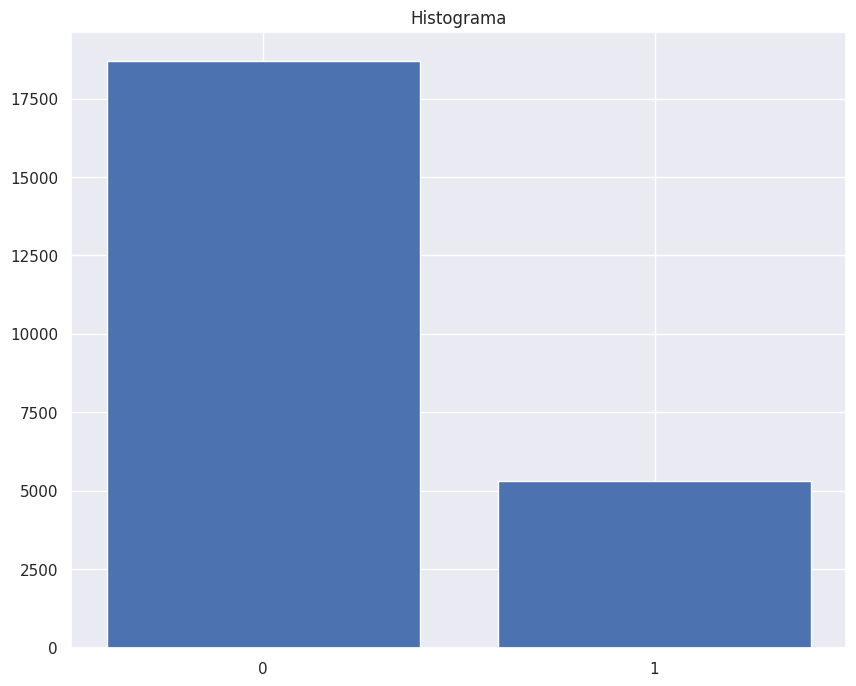

In [ ]:
import matplotlib.pyplot as plt
# Contar los valores de la clase 1 (valor 0)
num_val_clase_1 = y_train[y_train == 0].count()

# Contar los valores de la clase 2 (valor 1)
num_val_clase_2 = y_train[y_train == 1].count()

print("Número de valores de la clase 1: ", num_val_clase_1)
print("Número de valores de la clase 2: ", num_val_clase_2)
print("Proporción de valores de clase 1 respecto de la clase 2: ", round(num_val_clase_1/num_val_clase_2, 2))

# Crear una lista con los conteos
conteos = [num_val_clase_1, num_val_clase_2]

# Etiquetas para el histograma
etiquetas = ['0', '1']

# Histograma
plt.bar(etiquetas, conteos)
plt.title('Histograma')

# Mostrar los diagramas de caja
plt.show()

Como podemos ver en el histograma, hay un desbalanceo de datos enorme de casi 3,5 veces más datos de la clase 0 que de la clase 1. Esto puede ocasionar varios problemas:

*   Sesgo de clasificación: el modelo tiende a tener un sesgo hacia la clase mayoritaria y por tanto predecir con más frecuencia esa clase. Entonces puede tener dificultades para predecir correctamente la clase minoritaria

*   Engaños en la métrica: por ejemplo la accuracy, puede parecer muy buena pero lo único que hace es predecir la clase mayoritaria y eso no es lo adecuado. Para identificar esto podemos utilzar baselines para comparar

*   Mala generalización: si para los nuevos datos la distribución de las clases es distinta, nuestro modelo va a predecir muy mal

Soluciones ante el desbalanceo de datos:

*   Repetir ejemplos de la clase minoritaria (oversampling)
*   Eliminar ejemplos de la clase mayoritaria (no adecuado porque perdemos ejemplos, y siempre hay que tener el mayor número de ejemplos posibles)
*   Aumentar el error cuando no clasifico bien la clase minoritaria
*   Utilizar algoritmos que se ajusten naturalmente al desbalanceo de datos

A continuación haremos un análisis de las variables continuas y categóricas

In [ ]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = x_train[columna].count()
    rango_valores = f"{x_train[columna].min()} - {x_train[columna].max()}"
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

               Media   Mediana  Desviación Típica     Máximo    Mínimo  Valores Faltantes
LIMIT_BAL  167421.24  140000.0          129102.09   800000.0   10000.0                0.0
AGE            35.46      34.0               9.19       75.0      21.0                0.0
BILL_AMT1   51375.04   22467.5           73608.67   746814.0 -165580.0                0.0
BILL_AMT2   49407.91   21451.0           71120.37   743970.0  -69777.0                0.0
BILL_AMT3   47123.09   20202.5           69452.51  1664089.0 -157264.0                0.0
BILL_AMT4   43329.06   19147.0           64203.05   706864.0 -170000.0                0.0
BILL_AMT5   40375.05   18235.5           60585.64   823540.0  -81334.0                0.0
BILL_AMT6   38868.54   17162.5           59236.65   699944.0 -209051.0                0.0
PAY_AMT1     5702.73    2111.5           16797.40   873552.0       0.0                0.0
PAY_AMT2     5920.18    2009.0           23216.99  1684259

Como podemos comprobar en la tabla, no hay valores faltantes. En caso de que los hubiera, podríamos rellenarlos con técnicas como:

*   Media: rellenar con la media de la columna
*   Mediana: rellenar con la mediana de la columna
*   KNN: rellenar con la información de los k vecinos más cercanos

Incluso hay veces que el hecho de que falten valores nos da información sobre el problema. Por ejemplo, si faltasen muchos valores de una variable pues quizás se podría eliminar.

Dicho esto, los datos faltantes son un problema difícil de abordar pero como nosotros no tenemos pues se nos facilita.

Podemos observar que no hay ninguna variable constante (varianza = 0), en caso de que las hubiera se eliminarían ya que no aportan nada al modelo.

MATRIZ DE CORRELACIÓN DE VARIABLES CONTINUAS


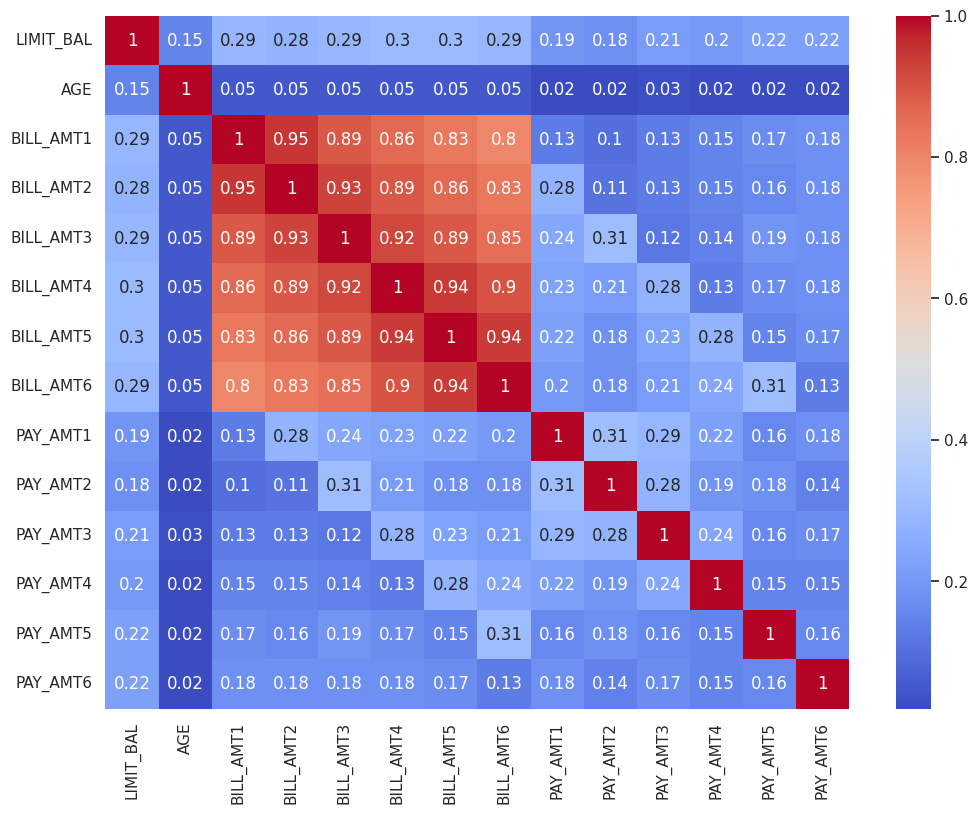

In [ ]:
print("MATRIZ DE CORRELACIÓN DE VARIABLES CONTINUAS")

# Calcular la matriz de correlación
matriz_correlacion = x_train[continuas_indices].corr().round(2)

sns.set(rc = {'figure.figsize':(12,9)}) # para que se vea más grande

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)

# Mostrar el gráfico
plt.show()

sns.set(rc = {'figure.figsize':(10,8)}) # restauramos el tamaño para próximas gráficas

Hemos creado una matriz de correlación en forma de mapa de calor para las variables continuas basada en los coeficientes de correlación de Pearson.

Como podemos observar no hay variables perfectamente correlacionadas (= 1), en caso de que las hubiera podríamos eliminar una de las dos ya que no estaría aportando nada nuevo respecto a la otra.

No obstante si que existen variables que tienen una alta correlación entre ellas (90%-95%), vemos que corresponden a la cantidad de dinero en cuenta en un mes y en el mes posterior o anterior a este, debido al reducido número de variables con las que contamos sumado a que tampoco existe una correlación perfecta decidimos dejar todas estas variables y no eliminar ninguna, ya que nos pueden ser util todas a la hora de entrenar nuestro modelo.

A continuación vamos a normalizar los datos. Esto es importante para que estén todos en un mismo rango de valores. La importancia de escalarlos es:

*   Evitar que algunas características dominen sobre otras
*   Mejorar la convergencia en algunos algoritmos como descenso de gradiente

Las variables categóricas ya se mueven en un rango entre 0 y 1 por tanto solo vamos a normalizar las variables continuas. Para ello utilizaremos el método de normalización que consiste en para cada valor x de la columna, restarle el mínimo de la columna y dividir entre el máximo menos el mínimo de la columna:
<center> $z = \frac{{x - x_{min}}}{{x_{max}-x_{min}}}$ </center>

Las variables del test también se normalizan y para ello se utilizan los factores usados en entrenamiento para normalizar.

----

Para estandarizar las variables utilizaremos las siguientes funciones de scikit-learn:

**MinMaxScaler().fit(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se guardan los factores de mínimo y máximo de X en la clase MinMaxScaler

---

**MinMaxScaler().transform(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se transforma X con los factores de mínimo y máximo de la clase MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler # para normalizar

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador utilizando los datos de train
scaler.fit(x_train[continuas_indices])

# Escalamos train y test con los factores de train
x_train[continuas_indices] = scaler.transform(x_train[continuas_indices])
x_test[continuas_indices] = scaler.transform(x_test[continuas_indices])

Comprobamos que se ha normalizado bien mediante un resumen de las variables continuas

In [ ]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo y mínimo
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

           Media  Mediana  Desviación Típica  Máximo  Mínimo
LIMIT_BAL   0.20     0.16               0.16     1.0     0.0
AGE         0.27     0.24               0.17     1.0     0.0
BILL_AMT1   0.24     0.21               0.08     1.0     0.0
BILL_AMT2   0.15     0.11               0.09     1.0     0.0
BILL_AMT3   0.11     0.10               0.04     1.0     0.0
BILL_AMT4   0.24     0.22               0.07     1.0     0.0
BILL_AMT5   0.13     0.11               0.07     1.0     0.0
BILL_AMT6   0.27     0.25               0.07     1.0     0.0
PAY_AMT1    0.01     0.00               0.02     1.0     0.0
PAY_AMT2    0.00     0.00               0.01     1.0     0.0
PAY_AMT3    0.01     0.00               0.02     1.0     0.0
PAY_AMT4    0.01     0.00               0.02     1.0     0.0
PAY_AMT5    0.01     0.00               0.04     1.0     0.0
PAY_AMT6    0.01     0.00               0.03     1.0     0.0



Anteriormente en la matriz de correlación hemos visto que hay variables altamente correladas pero que no llegan a estar perfectamente correladas. Por tanto, vamos a aplicar el Análisis de Componentes Principales (PCA) sobre nuestras variables continuas para intentar reducir la dimensionalidad de nuestro conjunto de datos mientras se mantiene la información relevante de los datos originales.

------
Para aplicar PCA utilizaremos la siguiente función de scikit-learn:

**PCA().fit(X)** donde X es el conjunto de datos donde se aplica PCA

Tras llamar a la función se ajustan los parámetros de PCA para X

----
**PCA().transform(X)** donde X es el conjunto de datos donde se aplica PCA

Tras llamar a la función se aplica la reducción de dimensionalidad en X

Número de variables continuas:  14


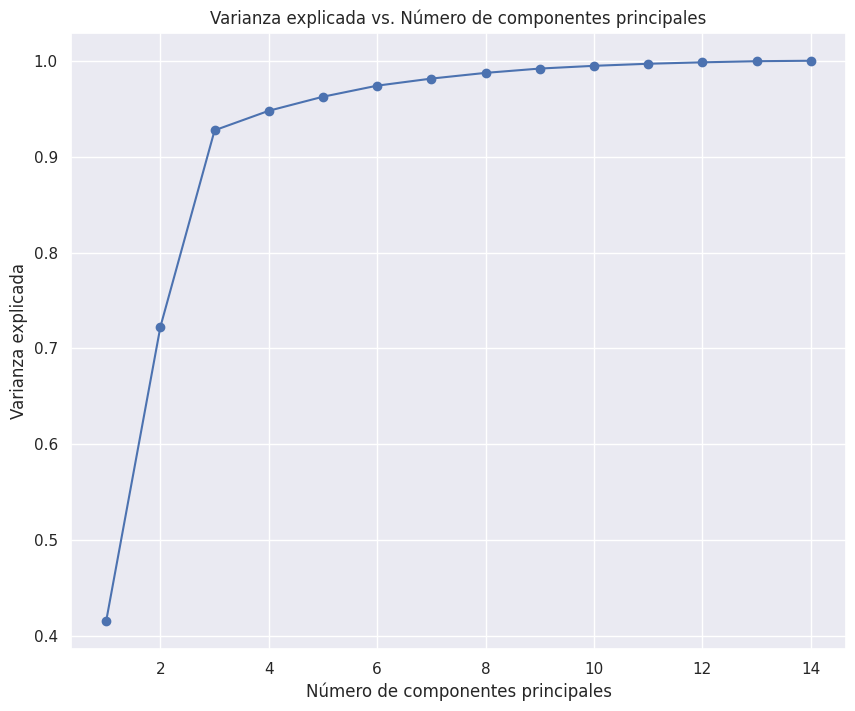

In [ ]:
from sklearn.decomposition import PCA # para el PCA
import numpy as np

# Crear una instancia de PCA y ajustar los datos
pca = PCA(n_components=len(continuas_indices))
pca.fit(x_train[continuas_indices])

# Obtén la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Calcula la varianza explicada acumulativa
cumulative_variance_explained = np.cumsum(variance_explained)

# Crea una lista con el número de componentes principales
num_components = range(1, len(variance_explained) + 1)


print("Número de variables continuas: ", len(continuas_indices))

# Grafica la varianza explicada acumulativa
plt.plot(num_components, cumulative_variance_explained, marker='o', linestyle='-', color='b')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada vs. Número de componentes principales')
plt.show()

En la siguiente gráfica podemos ver como va aumentando la varianza explicada dependiendo del número de variables con las que nos quedemos, cuando pasamos de tres a dos variables podemos observar que empieza a disminuir drásticamente la varianza, podríamos elegir quedarnos con esas tres variables más reelevantes, el problema es que perdemos bastante varianza, lo ideal es poder suprimir variables pero sin sacrificar varianza, volviendo a ver la gráfica se puede observar que hasta diez variables la varianza apenas disminuye, cuando bajamos a nueve variables la pendiente de la recta se acentua, por lo que ya no es rentable seguir eliminando variables, pues la varianza empieza a disminuir a un ritmo mayor que antes. Por tanto decidimos quedarnos con las diez variables continuas más importantes del dataset.

In [ ]:
# Aplicar PCA como tal para quedarnos con 10 variables continuas
pca = PCA(n_components=10)
print('Características antes de aplicar PCA: ', len(x_train.columns))
pca.fit(x_train[continuas_indices])
x_transformada = pca.transform(x_train[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_train = x_train.drop(continuas_indices, axis=1)
x_train = pd.concat([x_train.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)
print('Características tras aplicar PCA: ', len(x_train.columns))
x_train.head()

Características antes de aplicar PCA:  70
Características tras aplicar PCA:  66


,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,...,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,1,0,...,0.038525,0.176262,-0.206819,-0.077266,0.173188,0.334018,-0.028320,-0.135586,-0.019473,-0.018914
1,0,1,0,0,0,0,0,1,0,0,...,0.010312,-0.106289,-0.075340,0.029330,0.026637,-0.016518,0.002707,-0.007891,-0.009426,-0.005048
2,1,1,0,0,0,0,0,0,1,0,...,0.109086,-0.113736,0.154080,0.029419,-0.012937,-0.000554,0.004895,-0.012626,-0.005685,-0.002644
3,1,1,0,0,0,0,0,0,1,0,...,-0.304383,0.133921,0.012007,0.002028,0.005029,0.012106,-0.002738,-0.004031,-0.001989,0.000151
4,1,0,0,1,0,0,0,1,0,0,...,-0.083038,-0.152910,0.125135,-0.012572,0.015570,-0.002452,0.060962,-0.019290,0.018127,0.000215


In [ ]:
# Aplicamos también ahora la misma transformación de PCA a test con los factores de train
x_transformada = pca.transform(x_test[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_test = x_test.drop(continuas_indices, axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)

### 4. Elección de los modelos de aprendizaje, funciones de pérdida y métricas de error a usar

Vamos a utilizar 1 modelo lineal y 2 no-lineales y vamos a comparar con cross-validation para ver cuál es mejor:

*   Conjunto de hipótesis: regresión logística y algoritmo de aprendizaje SGD.
Las principales ventajas de usar regresión logística son:
  *   Interpretabilidad: La Regresión Logística proporciona coeficientes que indican la contribución relativa de cada característica en la clasificación. Esto permite interpretar el impacto de cada variable en la predicción.
  *   Eficiencia computacional: La Regresión Logística es un algoritmo computacionalmente eficiente, especialmente en comparación con modelos más complejos como las redes neuronales.
  *   Probabilidad: La Regresión Logística cuenta con una función de probabilidad, donde para cada muestra aparte de predecir a que clase pertenece nos indica cual es la probabilidad de pertenecer es dicha clase, para este problema en cuestión puede venir bien, ya que aparte de predecir si un cliente incurrirá en impagos o no también conoceremos la probabilidad de que esto ocurra y puede ser usado adicionalmente para decidir si darle un crédito a esa persona o no.

  Sin embargo, es importante tener en cuenta que la Regresión Logística al ser un modelo lineal para conjuntos de datos que no están separados de dicha forma probablemente de peores resultados que modelos no lineales que si se pueden ajustar mejor a conjuntos de datos separados no linealmente.

*   Conjunto de hipótesis: SVM con kernel polinómico y algoritmo de aprendizaje QP (Quadratic Programming), sus principales ventajas son:
  * Interpretación y explicabilidad: Los vectores de soporte en los SVM proporcionan información sobre los puntos de datos más importantes para la separación de clases. Esto permite una mayor interpretación y explicabilidad del modelo, ya que se puede analizar cómo estos puntos influyen en la clasificación.

  * Robustez ante datos atípicos: Los SVM son menos sensibles a los datos atípicos o ruido en comparación con otros modelos, como los basados en regresión lineal. Debido a que se basan en vectores de soporte, que son puntos de datos críticos para la clasificación, los valores atípicos tienen un impacto limitado en la posición del hiperplano de separación.

  En cuanto a porqué usar un kernel polinómico en vez de cualquier otro tipo de kernel no lineal, esto es debido a que en comparación con otros kernels más complejos, como el kernel gaussiano (RBF), el kernel polinómico es menos propenso al sobreajuste.

*   Conjunto de hipótesis: Random Forest y algoritmo de aprendizaje bagging, sus ventajas frente a otros modelos son:
  * Precisión y rendimiento: Random Forest tiene un rendimiento robusto y se considera uno de los modelos más precisos para la clasificación y regresión. Combina las predicciones de múltiples árboles de decisión para obtener una predicción final más precisa y reduce el riesgo de sobreajuste.

  * Resistencia al ruido y valores atípicos: Random Forest es menos sensible a los valores atípicos y al ruido en los datos. Al promediar las predicciones de múltiples árboles de decisión, los valores atípicos tienden a tener un impacto menor en el resultado final.

  * Manejo de datos desequilibrados: Random Forest puede manejar conjuntos de datos desequilibrados, donde las clases tienen distribuciones desproporcionadas. La técnica de muestreo balanceado utilizada en Random Forest permite tratar adecuadamente los datos desequilibrados y proporcionar una clasificación más precisa en estas situaciones.

  * Eficiencia computacional: Random Forest puede paralelizarse fácilmente y aprovechar el poder de cómputo distribuido. Esto lo hace adecuado para conjuntos de datos grandes y computacionalmente intensivos.

  * Resistencia al sobreajuste: Random Forest tiene un menor riesgo de sobreajuste en comparación con un solo árbol de decisión. Al combinar múltiples árboles y tomar decisiones basadas en votación o promedio, el modelo es menos propenso a memorizar el conjunto de entrenamiento.



Las funciones de pérdida de los modelos que vamos a usar son:

*   Para regresión logística: la entropía cruzada
<center> $E_{in}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N} ln(1+e^{-y_i \mathbf{w}^T\mathbf{x}_i})$ </center>
*   Para SVM con kernel polinómico: la pérdida de bisagra (hinge loss)
<center> $L(\mathbf{w}) = C + C \sum \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i))$ </center>
siendo C la constante de regularización
*   Para Random Forest no hay función de pérdida porque funciona mediante árboles

Las métricas que vamos a usar serán:

*   **Accuracy**: elementos clasificados correctamente frente al total. Es la medida más directa para medir la calidad de un clasificador, pero no es apropiada cuando las clases están desbalanceadas.
*   **Precision**: elementos clasificados correctamente como positivos respecto del total de elementos clasificados como positivos.
*   **Sensitivity**: número de elementos clasificados correctamente como positivos frente al total de clasificados como positivos
*   **Specitivity**: número de elementos clasificados correctamente como negativos frente al total de clasificados como negativos
*   **Matriz de confusión**: para ver los verdaderos positivos y negativos y los falsos positivos y negativos

### 5. Selección de los hiperparámetros y tipo de regularización.

Para encontrar los mejores hiperparámetros usaremos cross-validation con cada hiperparámetro (según unos candidatos elegidos) y compararemos para escoger el mejor.

El uso de cross-validation es beneficioso por:

*   Hace una evaluación más precisa del rendimiento del modelo ya que hace múltiples ajustes y evita que la evaluación dependa mucho del conjunto de test elegido (porque usa la media del rendimiento de cada split)
*   Evita el data snooping ya que todo el proceso es sobre los datos de entrenamiento
*   Nos ayuda a elegir un modelo u otro dependiendo del rendimiento de cada uno. También se puede utilizar para la selección de hiperparámetros

Crearemos las siguientes funciones:

*   **crossValidation**: función para hacer crossvalidation (en nuestro caso de 5-fold) dado un modelo y un conjunto de datos. Devuelve las medias de las métricas y la matriz de confusión.
Dentro de esta función utilizamos:
  * La función KFold(n) de scikit-learn que nos parte el conjunto de datos en n splits para hacer la validación cruzada
  * La función fit(x, y) para entrenar el modelo con los conjuntos x e y
  * La función predict(x) para predecir las etiquetas dado un conjunto de datos
*   **graficaComparacion**: función para realizar un gráfico de barras agrupado para ver mejor las diferencias entre métricas para cada hiperparámetro.
*   **tablaComparacion**: función para realizar una tabla comparativa para las distintas métricas de cada hiperparámetro
*   **visualizarCM**: función para mostrar las matrices de confusión según cada hiperparámetro.

Para calcular las métricas utilizamos la función confusion_matrix(y_true, y pred) donde y_true son las etiquetas reales e y_pred las etiquetas que hemos predecido. Una vez tenemos la matriz de confusión sacamos el resto de métricas

In [ ]:
from sklearn.linear_model import SGDClassifier # para hacer regresión logística
from sklearn.svm import SVC # para hacer SVM
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer, log_loss, confusion_matrix # para las métricas de clasificación

In [ ]:
def crossValidation(model, dataset_x, dataset_y):
  # Definir el objeto KFold con 5 folds
  kf = KFold(n_splits=5)
  # Convertimos los datasets a numpy
  x = dataset_x.to_numpy()
  y = dataset_y.to_numpy()

  conf_matrix = np.zeros((2, 2))
  iters = 0

  for train_index, val_index in kf.split(x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(x_train, y_train)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(x_val)

    # Calcular la matriz de confusión
    conf_matrix += np.array(confusion_matrix(y_val, pred_y))

  conf_matrix = conf_matrix/5

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  fn = conf_matrix[1,0]
  tp = conf_matrix[1,1]

  # Calcular métricas de error
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  especificidad = tn / (tn + fp)
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)

  return accuracy, especificidad, recall, precision, conf_matrix.astype(int)

In [ ]:
def graficaComparacion(valores, titulos, categorias):
  sns.set(rc = {'figure.figsize':(10,8)})

  # Configurar los valores de las barras y su posición en el eje x
  num_variables = len(valores)
  x = np.arange(len(categorias))
  ancho_barras = 0.5 / num_variables

  # Crear la figura y los ejes
  fig, ax = plt.subplots()

  # Ir añadiendo las barras de los distintos modelos
  for i in range(num_variables):
    desplazamiento = i * ancho_barras
    barras = ax.bar(x + desplazamiento, valores[i,:], ancho_barras, label=titulos[i])
    for barra in barras:
        altura = round(barra.get_height(), 3)
        if num_variables < 4:
          ax.annotate(altura, xy=(barra.get_x() + barra.get_width() / 2, altura),
                      xytext=(0, 3),  # Desplazamiento de la etiqueta (opcional)
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=8)

  # Etiquetas de las categorías en el eje x
  ax.set_xticks(np.arange(len(categorias)) + (num_variables - 1) * ancho_barras / 2)
  ax.set_xticklabels(categorias)

  # Leyenda y título del gráfico
  ax.legend()
  plt.title('Gráfica comparativa de métricas')

  # Mostrar el gráfico
  plt.show()

In [ ]:
def visualizaCM(cm, titulos):
  sns.set(rc = {'figure.figsize':(5,2)})

  # Crear figura y ejes
  if len(cm) > 1:
    fig, axes = plt.subplots(1, len(cm), figsize=(20, 5))

    for i in range(cm.shape[0]):
      # Crear mapa de calor utilizando seaborn
      sns.heatmap(cm[i][0], annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[i])

      # Configurar etiquetas de los ejes
      axes[i].set_xlabel('Predicciones')
      axes[i].set_ylabel('Etiquetas verdaderas')
      axes[i].set_title('Matriz de Confusión: ' + titulos[i])

  else:
    fig, axes = plt.subplots(figsize=(8, 4))
    # Crear mapa de calor utilizando seaborn
    sns.heatmap(cm[0][0], annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes)

    # Configurar etiquetas de los ejes
    axes.set_xlabel('Predicciones')
    axes.set_ylabel('Etiquetas verdaderas')
    axes.set_title('Matriz de Confusión: ' + titulos[0])

  # Mostrar la figura
  plt.show()

In [ ]:
def tablaComparacion(valores, categorias, titulos):
  # Imprimir la tabla
  metricas = []
  titulos2 = titulos.copy()
  titulos2.insert(0, 'Métricas de error')
  for i in range(len(valores[0])):
    fila = []
    fila.append(categorias[i])
    for j in range(len(valores)):
      fila.append(valores[j][i])
    metricas.append(fila)

  print(tabulate(metricas, headers=titulos2, tablefmt="fancy_grid"))

#### Regresión logística

**HIPERPARÁMETROS FIJOS**

Tenemos hiperparámetros que sabemos cuáles vamos a utilizar sin necesidad de comparar:

*   **loss**: la función de pérdida será la función de entropía cruzada ('log_loss')
*   **tasa de aprendizaje**: como hemos visto en teoría siempre es mejor tener un learning rate adaptativo ('adaptive') porque si es muy pequeño podemos no converger al óptimo ya que necesitaríamos muchísimas iteraciones, y si es muy grande podemos diverger o dar saltos alrededor del óptimo
*   **peso de las clases**: lo pondremos balanceado ('balanced') para que tenga en cuenta el desbalanceo de datos
*   **número de épocas**: lo pondremos a 1000 que es como está por defecto en la librería de scikit-learn, es un número alto de épocas pero también hay una condición que si en 5 épocas no han cambiado los pesos para.
*   **fit_intercept**: Sirve para introducir un término para el sesgo, en nuestro caso lo ponemos a True ya que no queremos que nuestro modelo pase obligatoriamente por el origen, como ya está por defecto a True simplemente lo obviamos.
*   **tol**: Representa la tolerancia para el criterio de convergencia del algoritmo de optimización utilizado en el modelo. La tolerancia determina cuándo se considera que el algoritmo ha convergido. Si el cambio en la función objetivo entre dos épocas consecutivas es menor que la tolerancia, se considera que el algoritmo ha convergido y se detiene el entrenamiento. Dejamos la tolerancia por defecto a 1e-3
*   **n_iter_no_change**: Número de épocas consecutivas sin mejorar el ajuste  antes de parar, es lo que comentabamos antes en el número de épocas, gracias a este parámetro no se tiene que llegar necesariamente al máximo de épocas para acabar el ajuste, sino que si este no mejora en 5 épocas consecutivas en nuestro caso directamente finalizamos el ejuste, elegimos 5 ya que consideramos que si en 5 épocas seguidas no se ha mejorado el ajuste probablemente ya se haya convergido al óptimo y no se necesite hacer el resto de épocas.




**REGULARIZACIÓN**

Vamos a probar con dos tipos de regularización:

*   L1: que aplica selección de características de modo implícito
<center> $\sum_{q=0}^{Q} \left| w_{q} \right| \leq C$ </center>
*   L2 (weight decay): tiene todas las variables en cuenta pero restringe los pesos
<center> $\sum_{q=0}^{Q} w_{q}^{2} \leq C$ </center>



In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
RL_1 = SGDClassifier(penalty='l1', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, random_state = 0)
RL_2 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, random_state = 0)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(RL_1, x_train, y_train)
result_2 = crossValidation(RL_2, x_train, y_train)

all_result = np.vstack((result_1, result_2))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['penalty L1', 'penalty L2']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤══════════════╤══════════════╕
│ Métricas de error   │   penalty L1 │   penalty L2 │
╞═════════════════════╪══════════════╪══════════════╡
│ Accuracy            │     0.780875 │     0.781208 │
├─────────────────────┼──────────────┼──────────────┤
│ Especificidad       │     0.845701 │     0.846129 │
├─────────────────────┼──────────────┼──────────────┤
│ Sensitividad        │     0.552646 │     0.552646 │
├─────────────────────┼──────────────┼──────────────┤
│ Precision           │     0.504297 │     0.504991 │
╘═════════════════════╧══════════════╧══════════════╛


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


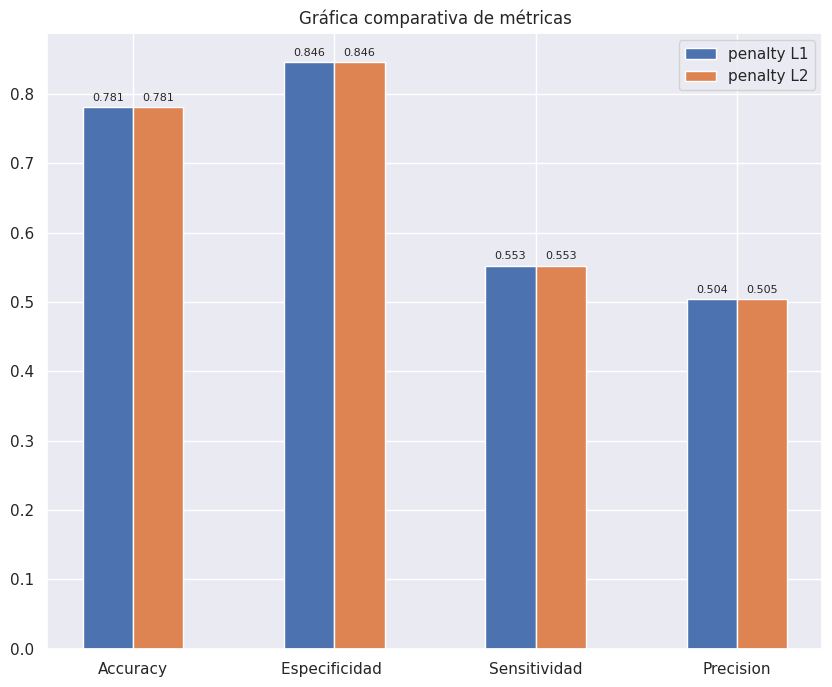

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

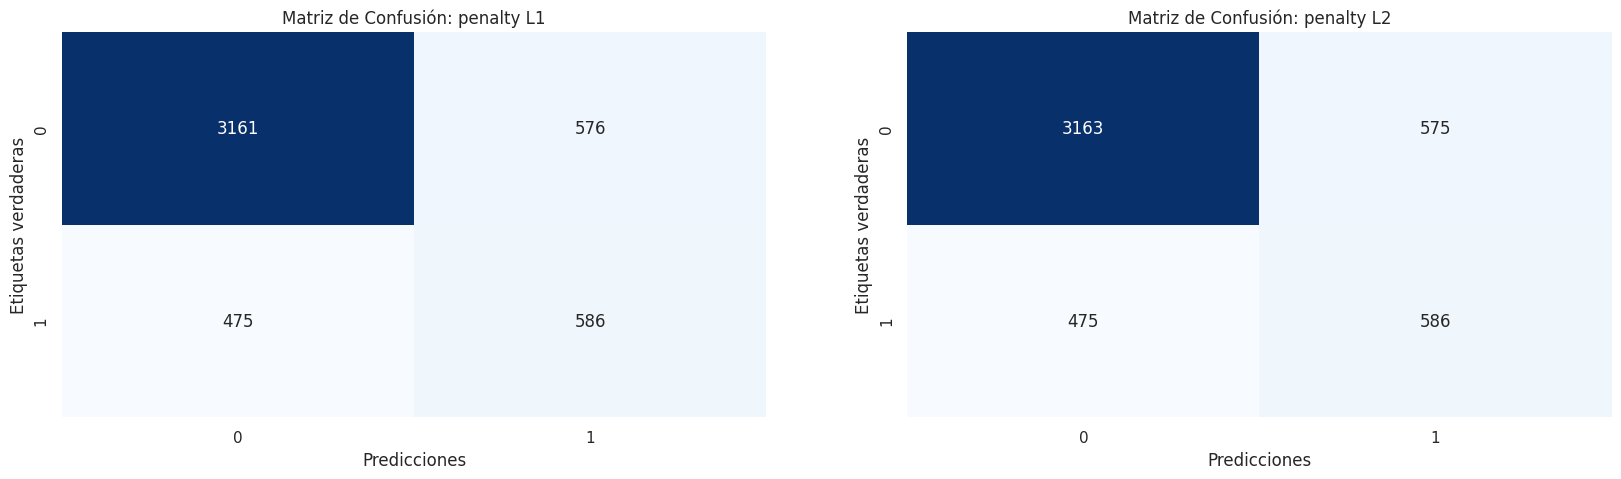

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

Ambos tipos de regularización nos dan resultados prácticamente idénticos, por lo que realmente no habría diferencia entre usar una regularización L1 o L2, sin embargo decidimos usar regularización L2, ya que esta tiene en cuenta todas las características y en nuestro problema el número de las mismas es bastante reducido, esto sumado a que ya hemos aplicado PCA para eliminar las características menos relevantes hace que usar regulación L1 frente a L2 no tenga mucho sentido, ya que todas las características deberían de tenerse en cuenta.

**CONSTANTE DE REGULARIZACIÓN**

Un mayor valor de esta constante significa mayor regularización y por tanto menos sobreajuste , pero en cambio tendríamos menos capacidad de generalización. Debemos buscar un compromiso entre sobreajuste y generalización por tanto vamos a probar con los siguientes valores para esta constante: <center>[0.01, 0.1, 1, 10, 100]</center>

In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
RL_1 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=0.01, random_state = 0)
RL_2 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=0.1, random_state = 0)
RL_3 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=1, random_state = 0)
RL_4 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=10, random_state = 0)
RL_5 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=100, random_state = 0)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(RL_1, x_train, y_train)
result_2 = crossValidation(RL_2, x_train, y_train)
result_3 = crossValidation(RL_3, x_train, y_train)
result_4 = crossValidation(RL_4, x_train, y_train)
result_5 = crossValidation(RL_5, x_train, y_train)

all_result = np.vstack((result_1, result_2, result_3, result_4, result_5))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['alfa 0.01', 'alfa 0.1', 'alfa 1', 'alfa 10', 'alfa 100']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤═════════════╤════════════╤══════════╤═══════════╤════════════╕
│ Métricas de error   │   alfa 0.01 │   alfa 0.1 │   alfa 1 │   alfa 10 │   alfa 100 │
╞═════════════════════╪═════════════╪════════════╪══════════╪═══════════╪════════════╡
│ Accuracy            │    0.788542 │   0.786375 │ 0.782917 │  0.779833 │   0.629917 │
├─────────────────────┼─────────────┼────────────┼──────────┼───────────┼────────────┤
│ Especificidad       │    0.860147 │   0.860468 │ 0.857686 │  0.851854 │   0.628912 │
├─────────────────────┼─────────────┼────────────┼──────────┼───────────┼────────────┤
│ Sensitividad        │    0.536448 │   0.525523 │ 0.519684 │  0.526276 │   0.633453 │
├─────────────────────┼─────────────┼────────────┼──────────┼───────────┼────────────┤
│ Precision           │    0.521421 │   0.516858 │ 0.509135 │  0.502247 │   0.326537 │
╘═════════════════════╧═════════════╧════════════╧══════════╧═══════════╧════════════╛


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


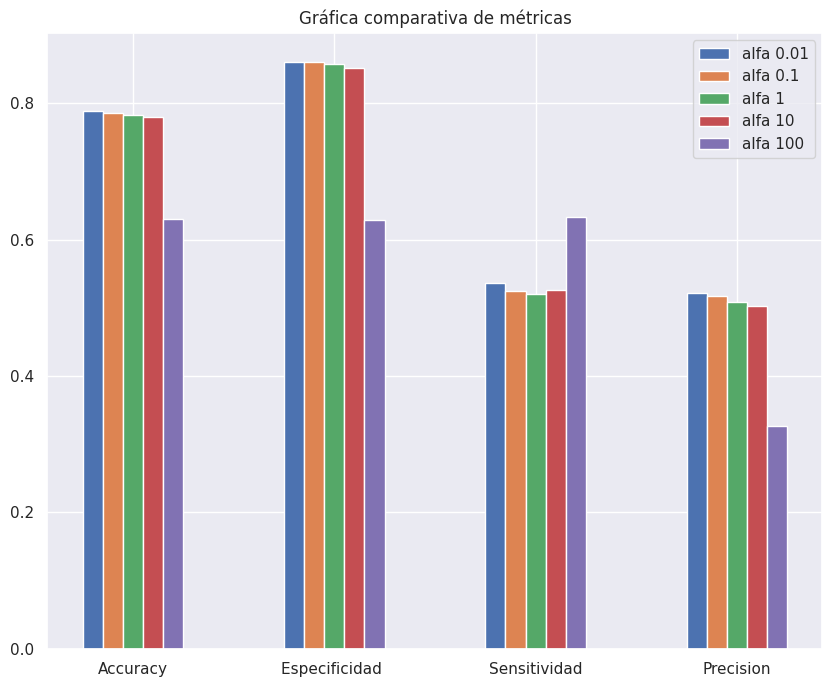

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

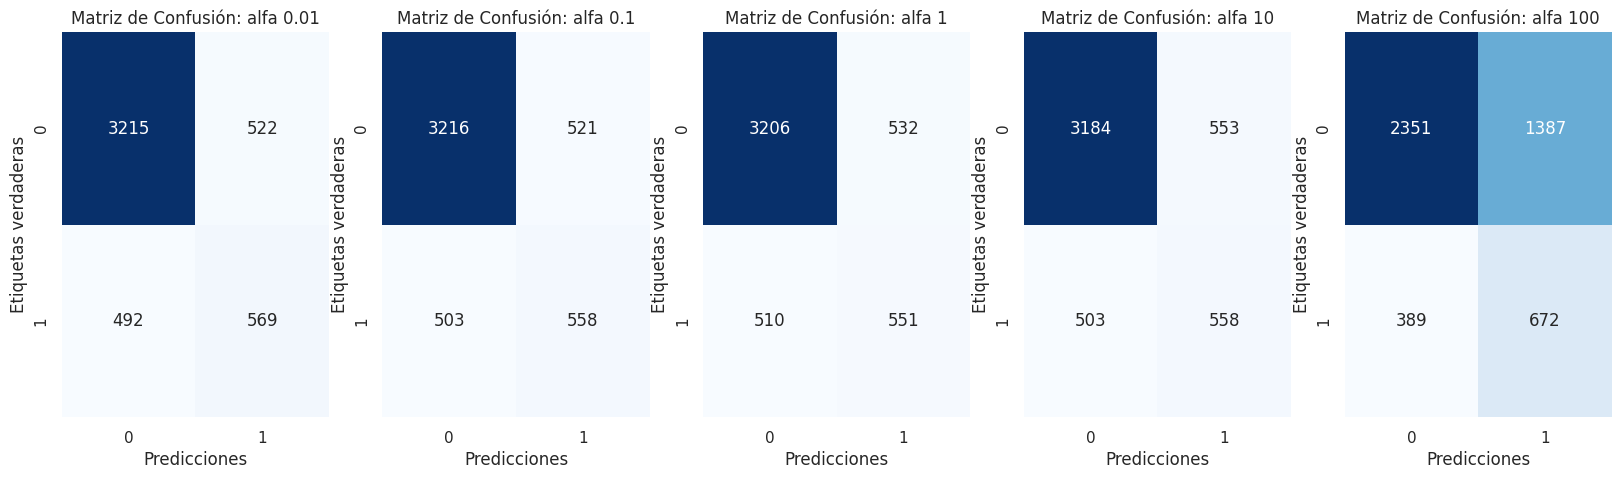

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

Vemos que con un nivel de regularización de 0.01 obtenemos los mejores resultados, no obstante debemos tener cuidado ya que con un alpha muy bajo podemos generar sobreajuste en nuestro modelo, ya que el factor de regularización es muy bajo. Aún así elegimos este valor de alpha=0.01, ya que consideramos que sigue siendo alto en comparación por ejemplo del valor por defecto que proporciona Scikit Learn que es 0.0001, aparte en los resultados obtenidos tampoco nos parece ver presencia de sobreajuste, tenemos un gran porcentaje de acierto para valores de la clase 0, ya que es la mayoritaría y por tanto acertar más valores de esta clase ayuda más a minimizar la función de pérdida que acertar más valores 1, pero este porcentaje no es tan elevado como para pensar que el modelo está sobreajustandose a los datos de entrenamiento.

**LEARNING RATE INICIAL**

El valor inicial de la tasa de aprendizaje es importante, porque aunque nuestro algoritmo vaya adaptandolo según la pendiente, es importante donde empieza. Vamos a probar con los siguientes valores: <center>[0.01, 0.1, 1]</center>


In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
RL_1 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=0.01, random_state = 0)
RL_2 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.1, alpha=0.01, random_state = 0)
RL_3 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=1, alpha=0.01, random_state = 0)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(RL_1, x_train, y_train)
result_2 = crossValidation(RL_2, x_train, y_train)
result_3 = crossValidation(RL_3, x_train, y_train)

all_result = np.vstack((result_1, result_2, result_3))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['eta 0.01', 'eta 0.1', 'eta 1']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤════════════╤═══════════╤══════════╕
│ Métricas de error   │   eta 0.01 │   eta 0.1 │    eta 1 │
╞═════════════════════╪════════════╪═══════════╪══════════╡
│ Accuracy            │   0.788542 │  0.788458 │ 0.7885   │
├─────────────────────┼────────────┼───────────┼──────────┤
│ Especificidad       │   0.860147 │  0.859933 │ 0.86004  │
├─────────────────────┼────────────┼───────────┼──────────┤
│ Sensitividad        │   0.536448 │  0.536824 │ 0.536636 │
├─────────────────────┼────────────┼───────────┼──────────┤
│ Precision           │   0.521421 │  0.521214 │ 0.521317 │
╘═════════════════════╧════════════╧═══════════╧══════════╛


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


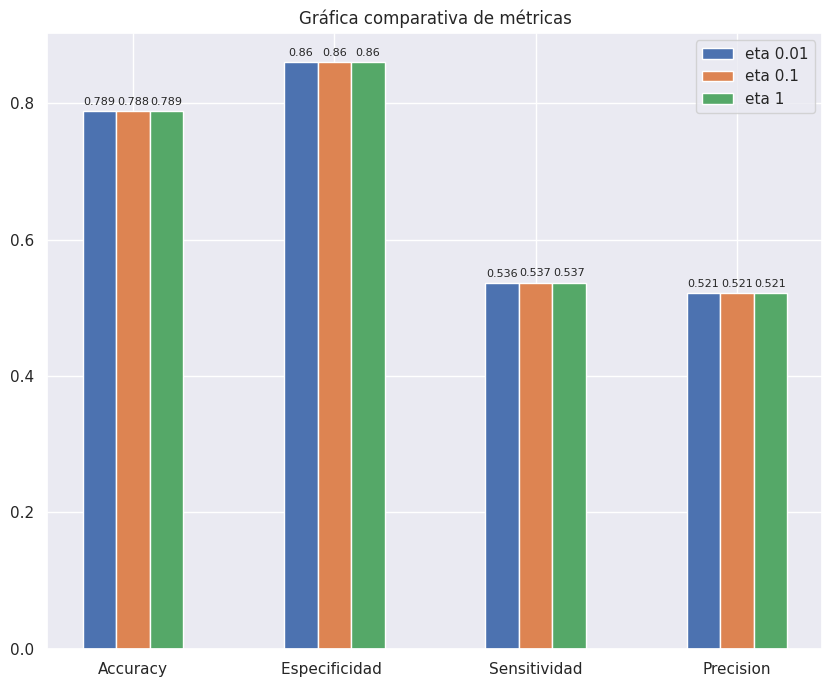

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

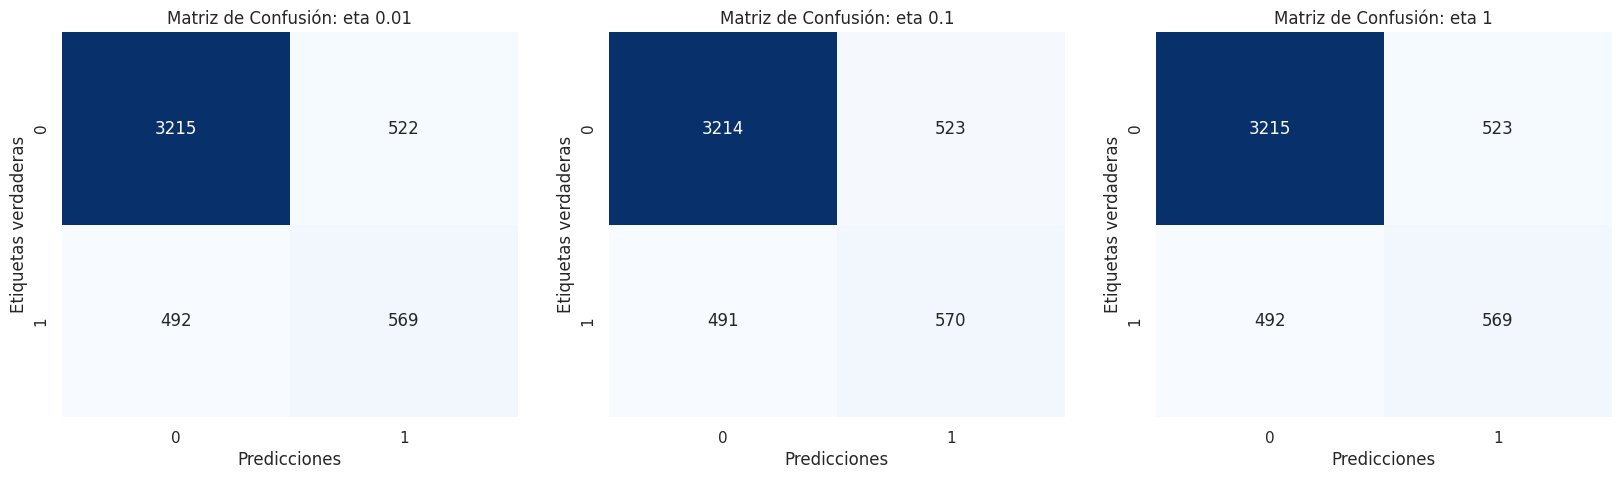

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

Vemos que todas las inicializaciones de learning rate que probamos nos devuelven resultados prácticamente idénticos, elegimos 0.01 como learning rate inicial simplemente porque tiene una accuracy mínimamente mejor que las otras inicializaciones y en el resto de métricas los resultados son iguales.

#### SVM polinomial

**HIPERPARÁMETROS FIJOS**

Tenemos hiperparámetros que sabemos cuáles vamos a utilizar sin necesidad de comparar:

*   **kernel**: el kernel será polinomial ('poly')
*   **peso de las clases**: lo pondremos balanceado ('balanced') para que tenga en cuenta el desbalanceo de datos
*   **número de iteraciones**: para encontrar los hiperparámetros lo pondremos a 15000 pero cuando comparemos con otros modelos no le pondremos límite de iteraciones, esto debido a los elevados tiempos de ejecución que tiene SVM.




**CONSTANTE REGULARIZACIÓN**

La función de pérdida del SVM ya aplica la regularización mediante la constante C. El tipo de regularización es L2 <center> $\sum_{q=0}^{Q} w_{q}^{2} \leq C$ </center>

A mayor C menor regularización. Vamos a probar con los siguientes valores para esta constante: <center>[0.01, 0.1, 1, 10]</center>




In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
SVM_1 = SVC(C=0.01, kernel='poly', class_weight="balanced")
SVM_2 = SVC(C=0.1, kernel='poly', class_weight="balanced")
SVM_3 = SVC(C=1.0, kernel='poly', class_weight="balanced")
SVM_4 = SVC(C=10, kernel='poly', class_weight="balanced")

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(SVM_1, x_train, y_train)
result_2 = crossValidation(SVM_2, x_train, y_train)
result_3 = crossValidation(SVM_3, x_train, y_train)
result_4 = crossValidation(SVM_4, x_train, y_train)

all_result = np.vstack((result_1, result_2, result_3, result_4))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['C 0.01', 'C 0.1', 'C 1.0', 'C 10']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤══════════╤══════════╤══════════╤══════════╕
│ Métricas de error   │   C 0.01 │    C 0.1 │    C 1.0 │     C 10 │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╡
│ Accuracy            │ 0.80475  │ 0.769708 │ 0.757125 │ 0.756958 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Especificidad       │ 0.897544 │ 0.82628  │ 0.80627  │ 0.81146  │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Sensitividad        │ 0.478056 │ 0.570541 │ 0.584102 │ 0.565078 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Precision           │ 0.569953 │ 0.482632 │ 0.461321 │ 0.459841 │
╘═════════════════════╧══════════╧══════════╧══════════╧══════════╛


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


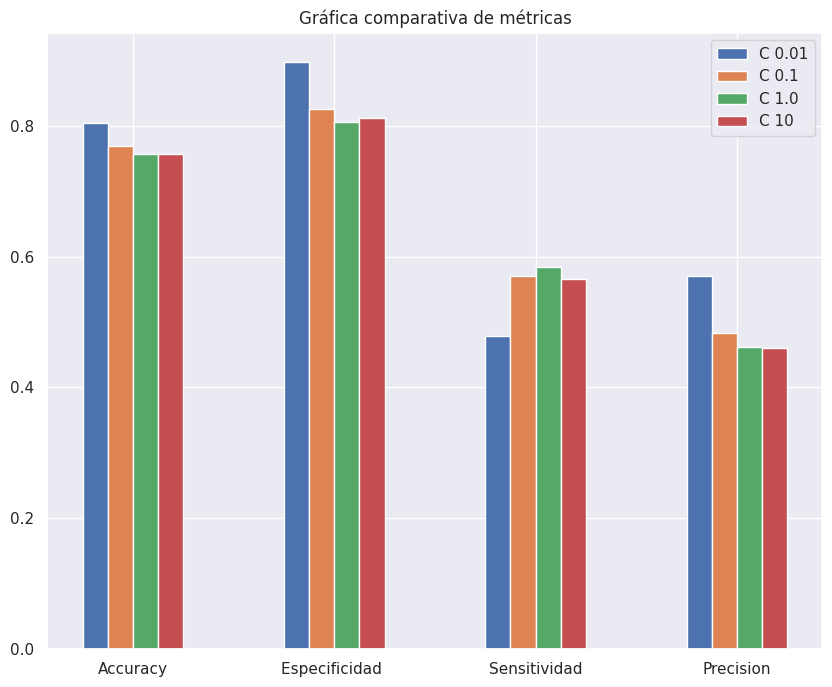

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

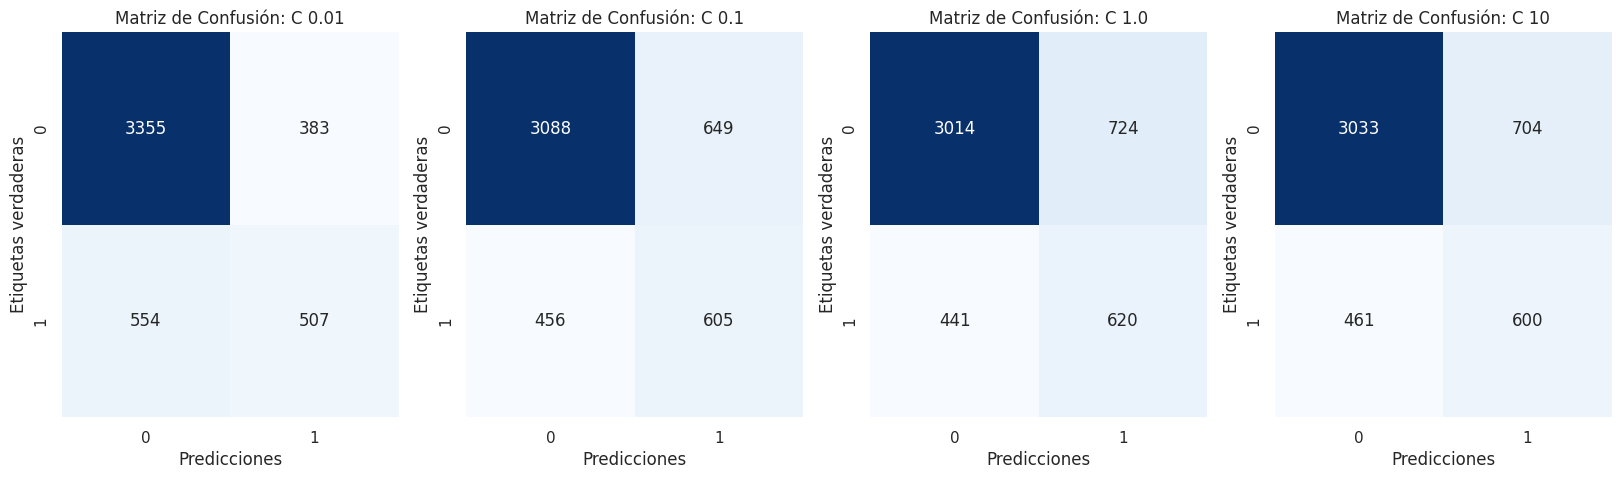

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

Podemos observar que los mejores resultados globales son obtenidos con C = 0.01, sin embargo su sensitividad es la menor de todos los valores probados, esto se debe a que en cierto punto el modelo debe sacrificar acertar muestras de la clase 1 para aceptar muestras de la clase 0 y así obtener menor error, ya que la clase 0 es dominante, en nuestro caso como la clase 0 significa no incurrir en impagos y la 1 si hacerlo sería más conveniente elegir C = 0.1, ya que para una entidad bancaria es mejor etiquetar un cliente como que va a incurrir en impago y luego que no sea así a creer que el cliente no incurrirá en impago y si que acabe incurriendo.

**GRADO DEL POLINOMIO**

El grado del polinomio significa cuánta complejidad va a tener nuestro modelo, a más grado, más complejidad, pero también puede sobreajustarse mucho más. Vamos a probar con los siguientes valores: <center>[3, 5, 7]</center>

In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
SVM_1 = SVC(C=0.1, degree=3, kernel='poly', class_weight="balanced")
SVM_2 = SVC(C=0.1, degree=5, kernel='poly', class_weight="balanced")
SVM_3 = SVC(C=0.1, degree=7, kernel='poly', class_weight="balanced")

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(SVM_1, x_train, y_train)
result_2 = crossValidation(SVM_2, x_train, y_train)
result_3 = crossValidation(SVM_3, x_train, y_train)

all_result = np.vstack((result_1, result_2, result_3))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['degree 3', 'degree 5', 'degree 7']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤════════════╤════════════╤════════════╕
│ Métricas de error   │   degree 3 │   degree 5 │   degree 7 │
╞═════════════════════╪════════════╪════════════╪════════════╡
│ Accuracy            │   0.769708 │   0.775708 │   0.77875  │
├─────────────────────┼────────────┼────────────┼────────────┤
│ Especificidad       │   0.82628  │   0.845541 │   0.858381 │
├─────────────────────┼────────────┼────────────┼────────────┤
│ Sensitividad        │   0.570541 │   0.529855 │   0.498399 │
├─────────────────────┼────────────┼────────────┼────────────┤
│ Precision           │   0.482632 │   0.493509 │   0.499906 │
╘═════════════════════╧════════════╧════════════╧════════════╛


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


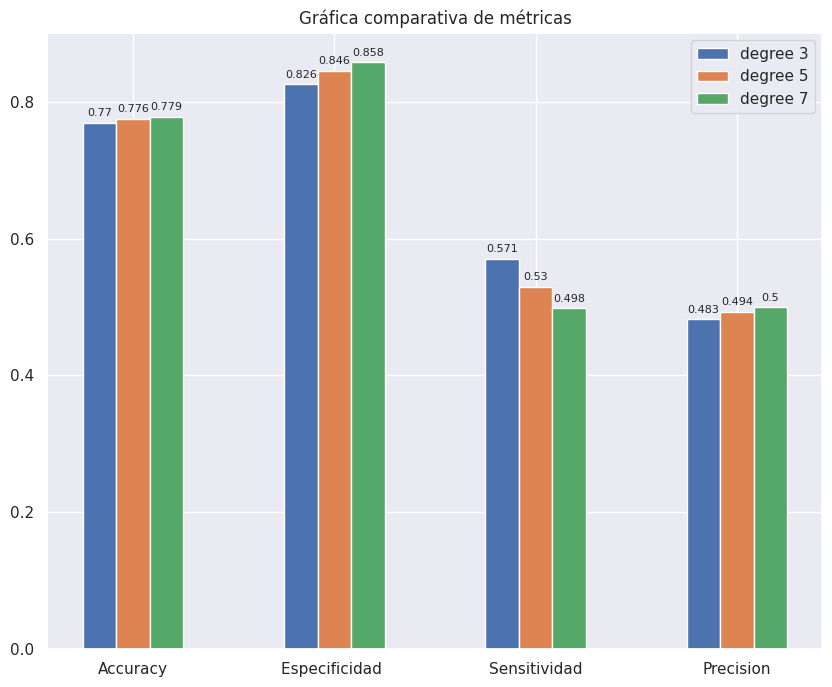

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

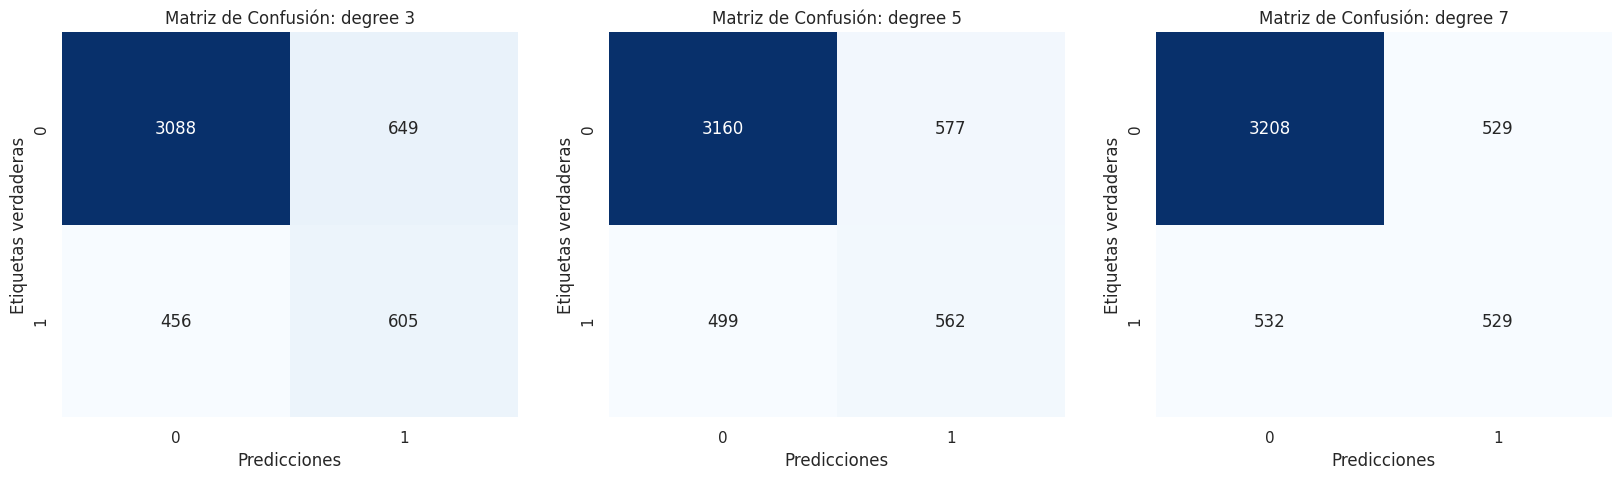

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

De la misma forma que al elegir el parámetro C óptimo, para el degree usaremos el mismo criterio, aunque un grado 3 tenga las peores estadísticas globales en cuanto a sensitividad es el mejor de los tres valores probados, esto sumado a que al aumentar el grado de nuestro modelo estamos también arriesgándonos a sufrir sobreajuste. Por tanto seleccionamos degree = 3.

#### Random Forest

**HIPERPARÁMETROS FIJOS**

Tenemos hiperparámetros que sabemos cuáles vamos a utilizar sin necesidad de comparar:

*   **variables para las ramificaciones**: lo dejamos por defecto, que es igual a $\sqrt{predictores}$, que como vimos en teoría es lo que se utiliza normalmente
*   **bootstrap**: El parámetro "bootstrap" en el modelo RandomForest de scikit-learn es una configuración que determina si se debe utilizar o no el muestreo con reemplazo durante la construcción de cada árbol en el bosque aleatorio. Lo dejamos a True por defecto, como hemos visto que se usa en clase de teoría.
*   **muestreo con reemplazo**: implica que durante la construcción de cada árbol en el bosque, se toma una muestra aleatoria de los datos de entrenamiento con la misma cantidad de muestras que el conjunto de entrenamiento original, pero permitiendo la posibilidad de que algunas muestras se repitan en la muestra de entrenamiento. Lo activaremos siempre para tener una mayor diversidad a la hora de entrenar los árboles y para evitar posible sobreajuste que podría darse en el caso de entrenar los árboles con todo el train set.




**PROFUNDIDAD MÁXIMA**

Cuánta más profundidad, nos estamos exponiendo a un mayor sobreajuste por tanto debemos tener un compromiso entre que el modelo ajuste bien pero no se sobreajuste.

Vamos a probar con los siguientes valores de profundidad: <center>[2, 5, 10, 20, 50]</center>




In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
from sklearn.ensemble import RandomForestClassifier
RF_1 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 2)
RF_2 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 5)
RF_3 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 10)
RF_4 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 20)
RF_5 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 50)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(RF_1, x_train, y_train)
result_2 = crossValidation(RF_2, x_train, y_train)
result_3 = crossValidation(RF_3, x_train, y_train)
result_4 = crossValidation(RF_4, x_train, y_train)
result_5 = crossValidation(RF_5, x_train, y_train)

all_result = np.vstack((result_1, result_2, result_3, result_4, result_5))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['max prof 2', 'max prof 5', 'max prof 10', 'max prof 20', 'max prof 50']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤══════════════╤══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Métricas de error   │   max prof 2 │   max prof 5 │   max prof 10 │   max prof 20 │   max prof 50 │
╞═════════════════════╪══════════════╪══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ Accuracy            │     0.7865   │     0.785375 │      0.790292 │      0.811625 │      0.814    │
├─────────────────────┼──────────────┼──────────────┼───────────────┼───────────────┼───────────────┤
│ Especificidad       │     0.859826 │     0.853673 │      0.85806  │      0.933176 │      0.952116 │
├─────────────────────┼──────────────┼──────────────┼───────────────┼───────────────┼───────────────┤
│ Sensitividad        │     0.528348 │     0.544924 │      0.551705 │      0.383688 │      0.327745 │
├─────────────────────┼──────────────┼──────────────┼───────────────┼───────────────┼───────────────┤
│ Precision           │     0.517051 │     0.514037 │      0.524722 │      0.61990

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


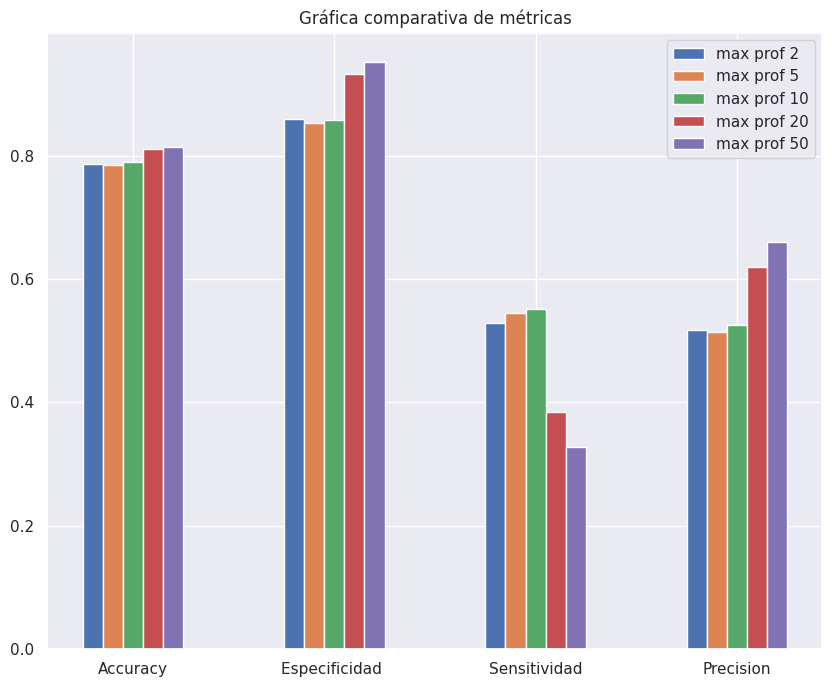

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

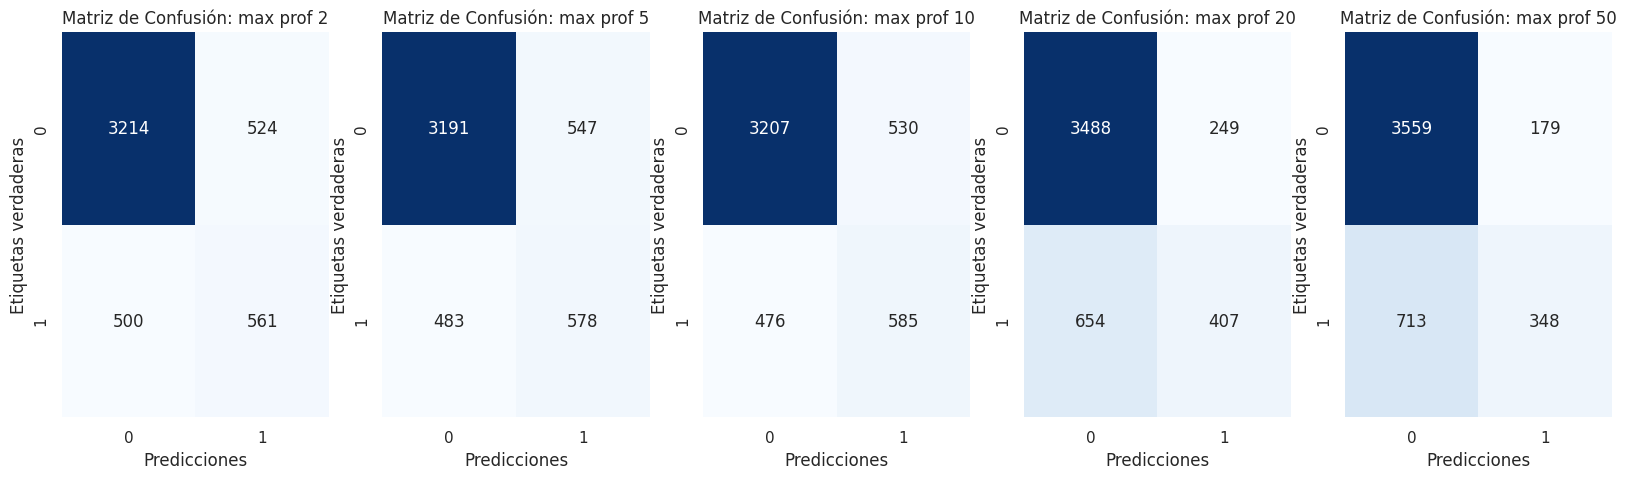

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

Nos quedamos con profundidad 10 ya que siguiendo el mismo criterio anterior, nos interesa más hacer buenas predicciones de la clase 1, y seleccionando una profundidad máxima de 10 nos permite mantener un mejor equilibrio entre predecir bien ambas clases.

**NÚMERO DE ÁRBOLES**

Normalmente a mayor número de árboles mejor es el clasificador pero llega un momento que la mejora apenas es notable.

Vamos a probar con los siguientes números de árboles: <center>[10, 50, 100, 200, 300]</center>




In [ ]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
from sklearn.ensemble import RandomForestClassifier
RF_1 = RandomForestClassifier(n_estimators = 10, class_weight='balanced', random_state=0, max_depth = 10)
RF_2 = RandomForestClassifier(n_estimators = 50, class_weight='balanced', random_state=0, max_depth = 10)
RF_3 = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=0, max_depth = 10)
RF_4 = RandomForestClassifier(n_estimators = 200, class_weight='balanced', random_state=0, max_depth = 10)
RF_5 = RandomForestClassifier(n_estimators = 300, class_weight='balanced', random_state=0, max_depth = 10)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result_1 = crossValidation(RF_1, x_train, y_train)
result_2 = crossValidation(RF_2, x_train, y_train)
result_3 = crossValidation(RF_3, x_train, y_train)
result_4 = crossValidation(RF_4, x_train, y_train)
result_5 = crossValidation(RF_5, x_train, y_train)

all_result = np.vstack((result_1, result_2, result_3, result_4, result_5))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['num trees 10', 'num trees 50', 'num trees 100', 'num trees 200', 'num trees 300']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤════════════════╤════════════════╤═════════════════╤═════════════════╤═════════════════╕
│ Métricas de error   │   num trees 10 │   num trees 50 │   num trees 100 │   num trees 200 │   num trees 300 │
╞═════════════════════╪════════════════╪════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Accuracy            │       0.787    │       0.7905   │        0.790292 │        0.79     │        0.790417 │
├─────────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Especificidad       │       0.858916 │       0.859291 │        0.85806  │        0.857739 │        0.858435 │
├─────────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Sensitividad        │       0.533811 │       0.548314 │        0.551705 │        0.551516 │        0.550951 │
├─────────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────┼───────────

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


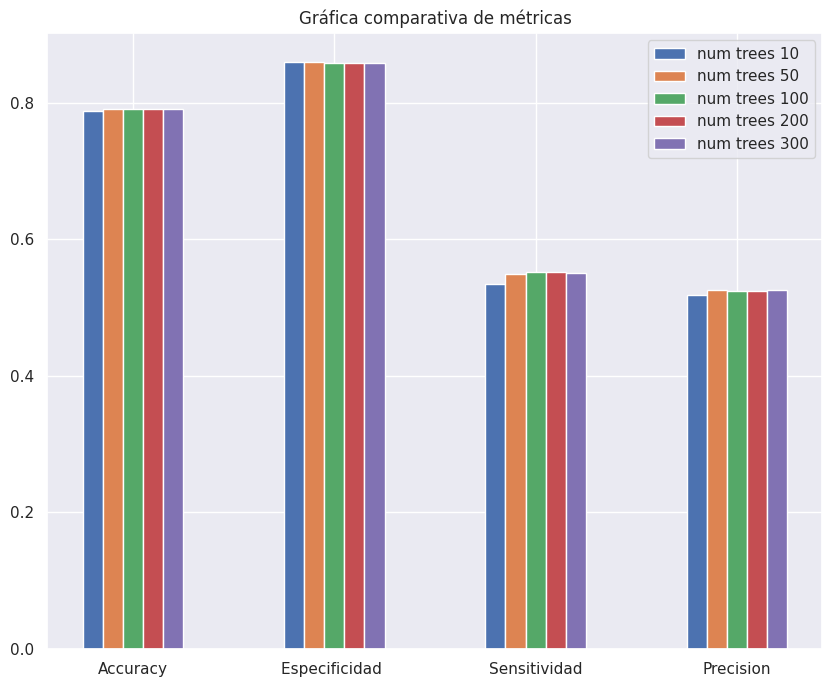

In [ ]:
# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:4], titulos, categorias)

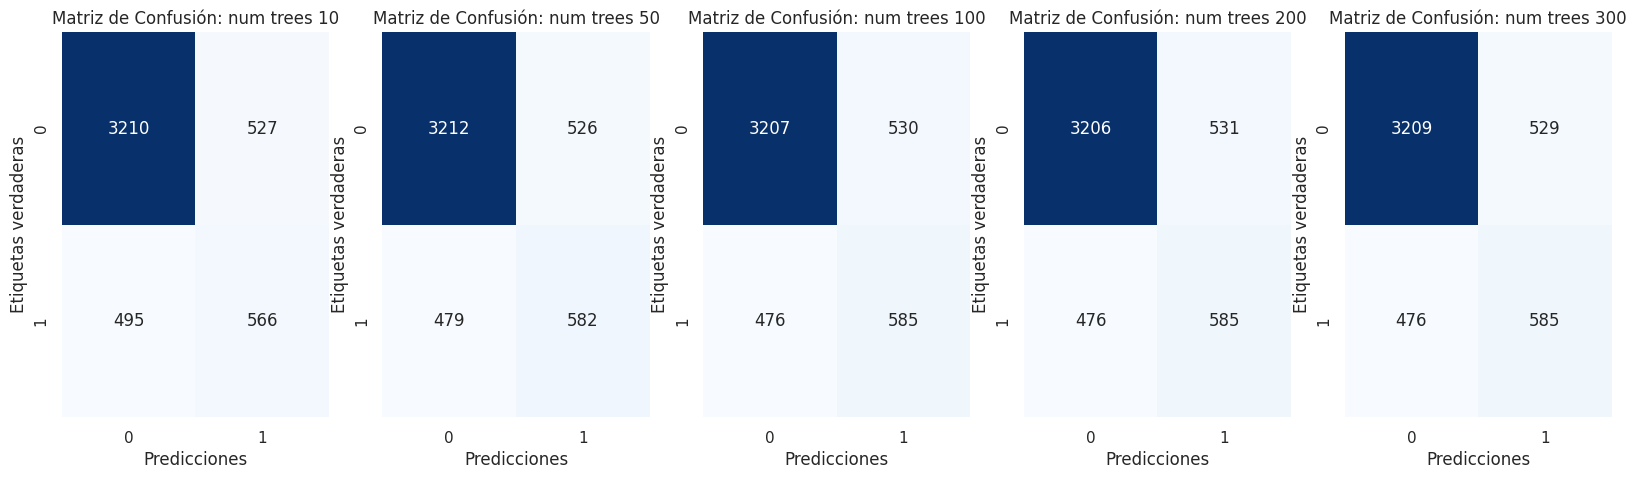

In [ ]:
# Visualizamos las matrices de confusión
visualizaCM(all_result[:, 4:5], titulos)

En nuestro caso parece que independientemente del número de árboles generado obtenemos resultados similares, sobre todo para 100, 200 y 300, decidimos generar 100 árboles, ya que su valor de sensitividad es algo mejor que para 200 y 300 árboles.

### 6. Validación cruzada para elección del mejor modelo

Ahora que ya sabemos los mejores hiperparámetros para cada modelo, vamos a usar crossvalidation para comparar entre los tres modelos (RL, SVM y RF) y nos quedaremos con el mejor

In [ ]:
model1 = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', class_weight='balanced', eta0=0.01, alpha=0.01, random_state=0)
model2 = SVC(C=0.1, degree=3, kernel='poly', class_weight="balanced")
model3 = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=0, max_depth=10)

result1 = crossValidation(model1, x_train, y_train)
result2 = crossValidation(model2, x_train, y_train)
result3 = crossValidation(model3, x_train, y_train)

all_result = np.vstack((result_1, result_2 , result_3))

categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['RL', 'SVM', 'RF']

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤══════════╤══════════╤══════════╕
│ Métricas de error   │       RL │      SVM │       RF │
╞═════════════════════╪══════════╪══════════╪══════════╡
│ Accuracy            │ 0.787    │ 0.7905   │ 0.790292 │
├─────────────────────┼──────────┼──────────┼──────────┤
│ Especificidad       │ 0.858916 │ 0.859291 │ 0.85806  │
├─────────────────────┼──────────┼──────────┼──────────┤
│ Sensitividad        │ 0.533811 │ 0.548314 │ 0.551705 │
├─────────────────────┼──────────┼──────────┼──────────┤
│ Precision           │ 0.518004 │ 0.525356 │ 0.524722 │
╘═════════════════════╧══════════╧══════════╧══════════╛


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


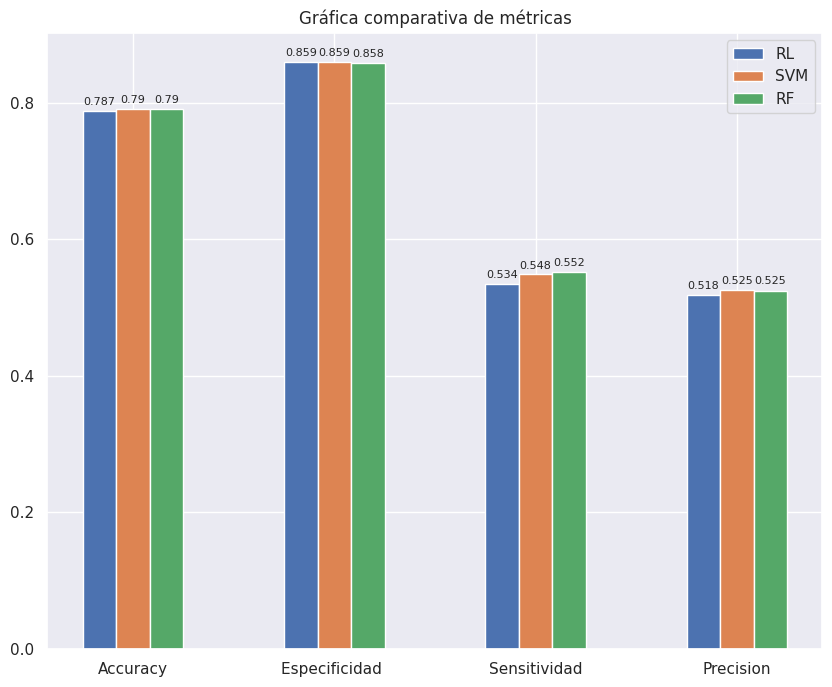

In [ ]:
graficaComparacion(all_result[:, 0:4], titulos, categorias)

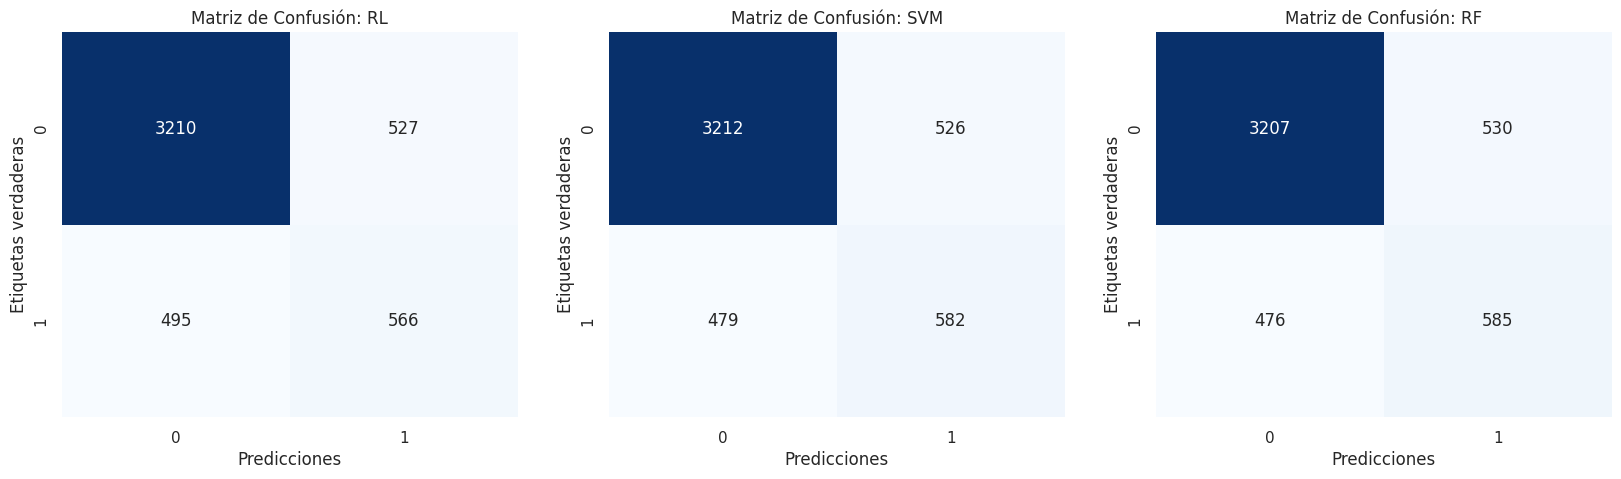

In [ ]:
visualizaCM(all_result[:, 4:5], titulos)

Los tres modelos obtienen resultados similares, de nuevo siguiendo la lógica de que es mejor acertar más valores de la clase 1 que de la clase 0 seleccionamos Random Forest como nuestra hipótesis ganadora, SVM tiene un porcentaje algo mayor en especificidad, pero en cuanto a sensitividad que es lo que más nos importa Random Forest es algo superior, en cuanto a Regresión Logística, aunque con resultados similares a los otros dos modelos, estos son algo inferiores, por lo que repito que seleccionamos a Random Forest como la hipótesis ganadora del problema.

### 7. Cálculo de la estimación del $E_{out}$ y valoración de los resultados



Una vez elegido el mejor modelo reentrenamos este y vemos que resultados obtenemos para el conjunto de test.

In [ ]:
model = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=0, max_depth=10)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(x_train.to_numpy(), y_train.to_numpy())

# Evaluar el desempeño del modelo en el conjunto de validación
y_pred = model.predict(x_test.to_numpy())

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test.to_numpy(), y_pred)

In [ ]:
categorias = ['Accuracy', 'Especificidad ', 'Sensitividad', 'Precision']
titulos = ['Mejor modelo']

result = []
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]
tp = conf_matrix[1,1]

# Calcular métricas de error
accuracy = (tp + tn) / (tp + tn + fp + fn)
result.append(accuracy)
especificidad = tn / (tn + fp)
result.append(especificidad)
recall = tp / (tp + fn)
result.append(recall)
precision = tp / (tp + fp)
result.append(precision)
result.append(conf_matrix)

all_result = np.array(result).reshape(1, -1)

tablaComparacion(all_result[:, 0:4], categorias, titulos)

╒═════════════════════╤════════════════╕
│ Métricas de error   │   Mejor modelo │
╞═════════════════════╪════════════════╡
│ Accuracy            │       0.780333 │
├─────────────────────┼────────────────┤
│ Especificidad       │       0.850203 │
├─────────────────────┼────────────────┤
│ Sensitividad        │       0.534288 │
├─────────────────────┼────────────────┤
│ Precision           │       0.503194 │
╘═════════════════════╧════════════════╛


<ipython-input-54-00a82437247b>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_result = np.array(result).reshape(1, -1)


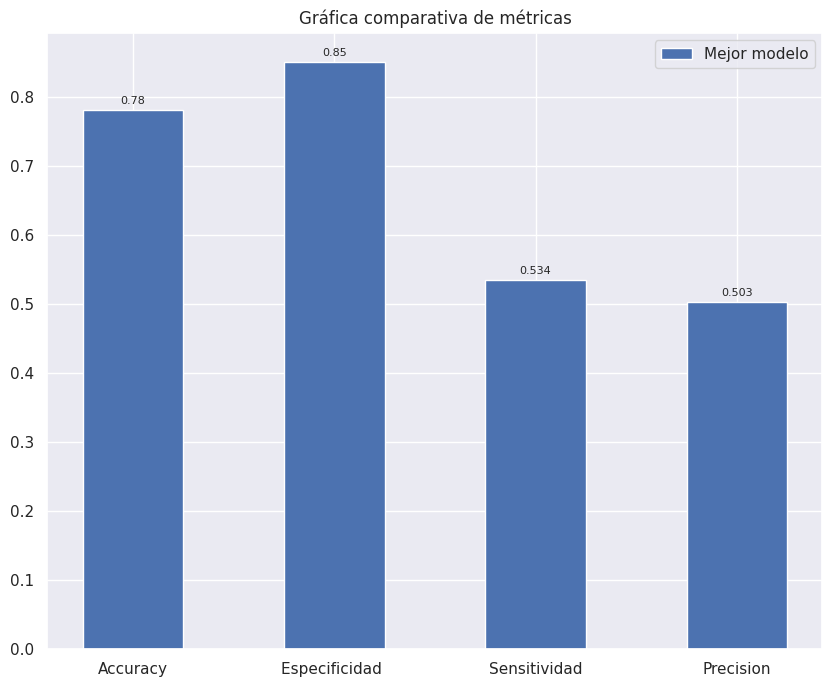

In [ ]:
graficaComparacion(all_result[:, 0:4], titulos, categorias)

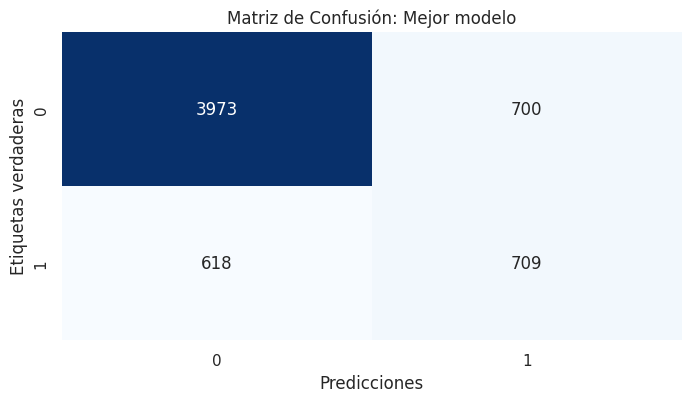

In [ ]:
visualizaCM(all_result[:, 4:5], titulos)

Vemos que todas las métricas son similares a las obtenidas con el conjunto de entrenamiento, por lo que el modelo generaliza bien fuera del training set, para la estimación de $E_{out}$ hacemos la suposición de que nuestro conjunto test es una muestra fiable de toda la población del problema, por lo que $E_{out}$ será similar a $E_{test}$ y como valor de $E_{test}$ usaremos missclassification rate, ya que es fácil de entender y el objetivo del ajuste era minimizarlo, por lo que $E_{test} = 0.219667$ y $E_{out} \approx E_{test}$

Con esta estimación debemos de admitir que el modelo no es todo lo bueno que podría o debería de ser, aunque tiene solo un ~22% de clasificar mal una muestra, que a priori no es un mal resultado, en cuanto a la sensitividad, esta es muy baja, por lo que nuestro modelo clasificará como cumplidores de pago a la mayor parte de clientes que si incurriran en impago, aunque no todo es malo, el modelo es lo suficientemente complejo como para no etiquetar cualquier muestra como clase 0, aunque no de forma perfecta pero el modelo es capaz de detectar algunas muestras de la clase 1.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x_train.to_numpy(), y_train.to_numpy(), scoring = 'accuracy', random_state=0)

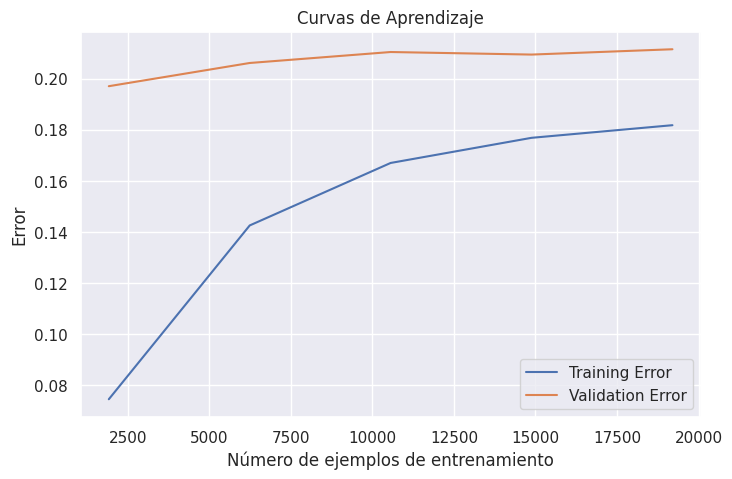

In [ ]:
sns.set(rc = {'figure.figsize':(8,5)}) # para gráficas bonitas
# Visualización de curvas de entrenamiento y validación
plt.plot(train_sizes, 1 - np.mean(train_scores, axis=1), label='Training Error')
plt.plot(train_sizes, 1 - np.mean(test_scores, axis=1), label='Validation Error')
plt.xlabel('Número de ejemplos de entrenamiento')
plt.ylabel('Error')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()

El eje horizontal representa la cantidad de ejemplos utilizados para entrenar el modelo, mientras que el eje vertical representa el error medido en missclasification rate.

Al principio, cuando se utilizan pocos ejemplos de entrenamiento el error de validación debería ser más alto y el de entrenamiento más bajo. Esto se debe a que el modelo no ha tenido suficiente información para aprender de los datos y al tener pocos datos para entrenar se ajusta muy bien al entrenamiento. A medida que aumentamos la cantidad de ejemplos de entrenamiento, el error disminuye gradualmente, ya que el modelo tiene más de los datos y por tanto se ajusta mejor.

En nuestro caso al principio no tenemos tanto error de validación porque como las clases están desbalanceadas, puede ser que al entrenar con pocos ejemplos la clase que más se prediga es la 0 que es la mayoritaria y por tanto eso tiene menos error.

Finalmente para números de ejemplos grandes ambos errores tienden a converger al mismo valor, esto es un indicativo de que nuestro modelo generaliza bien para datos de fuera de la muestra y por tanto no existe sobreajuste.

### Bibliografía usada

https://scikit-learn.org

https://numpy.org

https://aprendeia.com/kernel-maquinas-vectores-de-soporte-clasificacion-regresion/

Apuntes de teoría de clase

Práctica 3 de la asignatura

http://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

https://seaborn.pydata.org/generated/seaborn.heatmap.html